In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers



#Method with maximum accuracies: Decision Tree
#Maximum accuracies: 0.978021978021978

In [4]:
#використаємо датасет з 1 ЛР,попередньо видаливши з нього непрібні фічі
df = pd.read_csv('D:\KPI Styding\DataAnalysis\car_prediction_data.csv') 
df.head()
df=df.drop(['Car_Name','Present_Price','Owner',"Transmission"], axis=1)
df.info()
print('-------------------------------------------------------------')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.9+ KB
-------------------------------------------------------------
   Year  Selling_Price  Kms_Driven Fuel_Type Seller_Type
0  2014           3.35       27000    Petrol      Dealer
1  2013           4.75       43000    Diesel      Dealer
2  2017           7.25        6900    Petrol      Dealer
3  2011           2.85        5200    Petrol      Dealer
4  2014           4.60       42450    Diesel      Dealer


In [6]:
#проведемо нормалізацію, ковертуємо категоріальні фічі в числові
df["Fuel_Type"] = LabelEncoder().fit_transform(df["Fuel_Type"])
df["Seller_Type"] = LabelEncoder().fit_transform(df["Seller_Type"])
num_cols = df.select_dtypes(include = [np.number]).columns.tolist()
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])
df.info()
print('-------------------------------------------------------------')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    float64
 1   Selling_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    float64
 3   Fuel_Type      301 non-null    int32  
 4   Seller_Type    301 non-null    int32  
dtypes: float64(3), int32(2)
memory usage: 9.5 KB
-------------------------------------------------------------
       Year  Selling_Price  Kms_Driven  Fuel_Type  Seller_Type
0  0.733333       0.093123    0.053053          2            0
1  0.666667       0.133238    0.085085          1            0
2  0.933333       0.204871    0.012813          2            0
3  0.533333       0.078797    0.009409          2            0
4  0.733333       0.128940    0.083984          1            0


In [8]:
#розділимо датасет на тестову і тренувальну частину
X = df.drop(['Seller_Type'], axis = 1)
Y = df["Seller_Type"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
#створимо Sequential-модель, компілюємо її та проведемо навчання на тренувальних даних
model = keras.Sequential([layers.Dense(8, activation='tanh'),layers.Dense(1, activation="sigmoid")])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, epochs=10, batch_size=16,validation_split=0.2,verbose = 2)

Epoch 1/10


11/11 - 2s - loss: 0.6658 - accuracy: 0.6488 - val_loss: 0.6451 - val_accuracy: 0.6905 - 2s/epoch - 157ms/step
Epoch 2/10
11/11 - 0s - loss: 0.6582 - accuracy: 0.6488 - val_loss: 0.6329 - val_accuracy: 0.7143 - 63ms/epoch - 6ms/step
Epoch 3/10
11/11 - 0s - loss: 0.6533 - accuracy: 0.6369 - val_loss: 0.6229 - val_accuracy: 0.7143 - 61ms/epoch - 6ms/step
Epoch 4/10
11/11 - 0s - loss: 0.6494 - accuracy: 0.6429 - val_loss: 0.6153 - val_accuracy: 0.7143 - 63ms/epoch - 6ms/step
Epoch 5/10
11/11 - 0s - loss: 0.6464 - accuracy: 0.6369 - val_loss: 0.6100 - val_accuracy: 0.7143 - 63ms/epoch - 6ms/step
Epoch 6/10
11/11 - 0s - loss: 0.6438 - accuracy: 0.6369 - val_loss: 0.6064 - val_accuracy: 0.7143 - 65ms/epoch - 6ms/step
Epoch 7/10
11/11 - 0s - loss: 0.6419 - accuracy: 0.6369 - val_loss: 0.6030 - val_accuracy: 0.7143 - 61ms/epoch - 6ms/step
Epoch 8/10
11/11 - 0s - loss: 0.6404 - accuracy: 0.6369 - val_loss: 0.6005 - val_accuracy: 0.7143 - 62ms/epoch - 6ms/step
Epoch 9/10
11/11 - 0s 

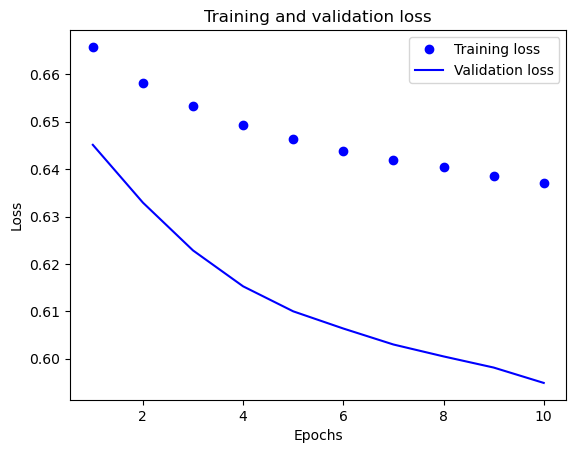

In [11]:
#побудуємо графік втрат 
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
#оцінимо ефективність моделі
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print(model.summary())

Test score: 0.6332951784133911
Test accuracy: 0.6373626589775085
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
#сформуємо датафрейм формату шлях_до_зображення->ознака
import os
from PIL import Image
pizza_path="D:\\KPI Styding\\DataAnalysis\\pizza_not_pizza\\pizza"
pizza_files = os.listdir(pizza_path)
pizza_df = pd.DataFrame({'path': [os.path.join(pizza_path, file) for file in pizza_files],'type': ['pizza'] * len(pizza_files)})

not_pizza_path=folder_path = "D:\\KPI Styding\\DataAnalysis\\pizza_not_pizza\\not_pizza"
not_pizza_files = os.listdir(not_pizza_path)
not_pizza_df = pd.DataFrame({'path': [os.path.join(not_pizza_path, file) for file in not_pizza_files],'type': ['not_pizza'] * len(not_pizza_files)})

merged_df = pd.concat([pizza_df, not_pizza_df], ignore_index=True)
image_df = merged_df.sample(frac=1).reset_index(drop=True)
print(image_df.head())

                                                path       type
0  D:\KPI Styding\DataAnalysis\pizza_not_pizza\no...  not_pizza
1  D:\KPI Styding\DataAnalysis\pizza_not_pizza\pi...      pizza
2  D:\KPI Styding\DataAnalysis\pizza_not_pizza\no...  not_pizza
3  D:\KPI Styding\DataAnalysis\pizza_not_pizza\pi...      pizza
4  D:\KPI Styding\DataAnalysis\pizza_not_pizza\no...  not_pizza


In [104]:
#Виведемо делька зображень для прикладу
def Show_images(df):
    plt.figure(figsize = (15, 15))
    cols = len(df)
    for path, value in df.iterrows():
        image = Image.open(value['path'])
        plt.subplot(1, cols, path + 1)
        plt.imshow(image)
        plt.title(f"{value['type']}", fontsize = 10)
        plt.axis("off")
    plt.show()

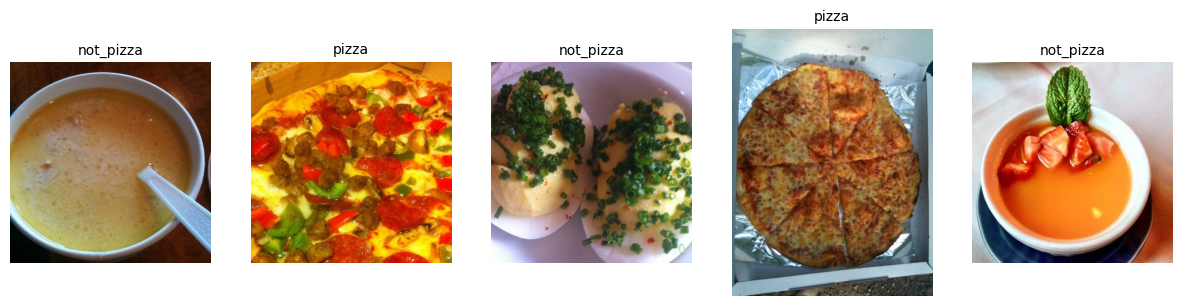

In [113]:
Show_images(image_df.head())

In [139]:
#функція зчитування зображень, зміню розмір зображення на менший - для пришвидшення роботи класифікації 
def Read_images(df):
    X = []
    Y = []
    for index, value in df.iterrows():
        image = Image.open(value['path'])
        resized_image = image.resize((200, 200))
        image = np.array(resized_image, dtype = np.float32) / 255
        X.append(image)
        Y.append(value['type'])
    return np.array(X), np.array(Y)

In [162]:
#сформуємо тестову та тренувальну вибірки
X, Y = Read_images(image_df)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1376, 200, 200, 3)
X_test shape: (590, 200, 200, 3)


In [163]:
#виконаємо нормалізацію
en = LabelEncoder()
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [164]:
#перетворимо вектори в двійкові матриці
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [172]:
#створимо модель та задамо її параметри
model =  keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [173]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_8 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 98, 98, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 98, 98, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 614656)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               78676096  
                                                      

In [174]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
11/11 [==============================] - 250s 22s/step - loss: 19.6054 - accuracy: 0.5298 - val_loss: 1.2751 - val_accuracy: 0.4763
Epoch 2/12
11/11 [==============================] - 247s 23s/step - loss: 0.7801 - accuracy: 0.5189 - val_loss: 0.6919 - val_accuracy: 0.5542
Epoch 3/12
11/11 [==============================] - 237s 22s/step - loss: 0.6841 - accuracy: 0.5778 - val_loss: 0.6929 - val_accuracy: 0.5525
Epoch 4/12
11/11 [==============================] - 238s 22s/step - loss: 0.6460 - accuracy: 0.6432 - val_loss: 0.6584 - val_accuracy: 0.6119
Epoch 5/12
11/11 [==============================] - 232s 21s/step - loss: 0.5495 - accuracy: 0.7406 - val_loss: 0.6508 - val_accuracy: 0.6373
Epoch 6/12
11/11 [==============================] - 241s 22s/step - loss: 0.4120 - accuracy: 0.8488 - val_loss: 0.8576 - val_accuracy: 0.5915
Epoch 7/12
11/11 [==============================] - 232s 21s/step - loss: 0.2850 - accuracy: 0.8939 - val_loss: 0.7962 - val_accuracy: 0.6186
Epoch

In [175]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.1393131017684937
Test accuracy: 0.6152542233467102


In [263]:
import math
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

[nltk_data] Downloading package punkt to C:\Users\Pavlo
[nltk_data]     Shchur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Pavlo
[nltk_data]     Shchur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pavlo
[nltk_data]     Shchur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [280]:
#Зчитаємо датасет, видалимо непотрібні поля та оберемо декілька категорій новин з поля "category" для аналізу
text_df = pd.read_json(r'D:\KPI Styding\DataAnalysis\News_Category_Dataset_v3.json', lines=True, encoding = "latin-1")
text_df=text_df.drop(['link','authors','date'], axis=1)
text_df['text'] = text_df['headline'] + text_df['short_description']
text_df = text_df[["category","text"]]
text_df = text_df[text_df["category"].isin(['WORLD NEWS','CRIME','BUSINESS'])]
print(text_df.head())
print(text_df.info())
print(text_df["category"].unique())

      category                                               text
7   WORLD NEWS  Puerto Ricans Desperate For Water After Hurric...
9   WORLD NEWS  Biden At UN To Call Russian War An Affront To ...
10  WORLD NEWS  World Cup Captains Want To Wear Rainbow Armban...
11  WORLD NEWS  Man Sets Himself On Fire In Apparent Protest O...
12  WORLD NEWS  Fiona Threatens To Become Category 4 Storm Hea...
<class 'pandas.core.frame.DataFrame'>
Index: 12853 entries, 7 to 209511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  12853 non-null  object
 1   text      12853 non-null  object
dtypes: object(2)
memory usage: 301.2+ KB
None
['WORLD NEWS' 'CRIME' 'BUSINESS']


In [281]:
text_df.shape

(12853, 2)

In [282]:
# Проведемо передобробку даних, видалимо стоп слова, знаки пунктуації, суфікси і тд
def Clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)  
    words = []
    stop_words = stopwords.words("english")
    for token in tokens:
        if token.isalpha():
            if token not in stop_words:
                words.append(token)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    stemmed_text = " ".join(words)
    return stemmed_text
print(text_df.head())
text_df["text"] = text_df["text"].apply(Clean_text)
mean_size = math.floor(text_df["text"].apply(len).max())
print(text_df.head())

      category                                               text
7   WORLD NEWS  Puerto Ricans Desperate For Water After Hurric...
9   WORLD NEWS  Biden At UN To Call Russian War An Affront To ...
10  WORLD NEWS  World Cup Captains Want To Wear Rainbow Armban...
11  WORLD NEWS  Man Sets Himself On Fire In Apparent Protest O...
12  WORLD NEWS  Fiona Threatens To Become Category 4 Storm Hea...
      category                                               text
7   WORLD NEWS  puerto rican desper water hurrican fiona rampa...
9   WORLD NEWS  biden un call russian war affront bodi charter...
10  WORLD NEWS  world cup captain want wear rainbow armband qa...
11  WORLD NEWS  man set fire appar protest funer japan abeth i...
12  WORLD NEWS  fiona threaten becom categori storm head bermu...


In [283]:
#розділимо датасет на тестову та тренувальну частину
x = text_df.drop(['category'], axis = 1)
y = LabelEncoder().fit_transform(text_df['category'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train)
print(y_train)

                                                     text
1437    massiv ferri fire kill least southern banglade...
24648   kb home cut ceo annual incent payment respons ...
196531  greec elect euro could rock votesom global bus...
159787  entrepreneur venic interview mario costralik g...
167054  lesson boston bomb stop classifi crimin anarch...
...                                                   ...
107963  secret publish successwhen start author friend...
120766                 jpmorgan hacker steal money report
122030                     american spend everi minut day
15097   australia spi agenc move secur cabinet fill ca...
4025    googl alphabet settl sharehold payoff exec acc...

[8997 rows x 1 columns]
[2 0 0 ... 0 2 0]


In [284]:
#токенізуємо текст та перетворимо текстові дані у послідовності цілих чисел  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts = x_train['text'])
vocab_size = len(tokenizer.word_index) + 1
x_train = tokenizer.texts_to_sequences(x_train['text'])
x_train_padded = pad_sequences(x_train, maxlen=mean_size)

x_test = tokenizer.texts_to_sequences(x_test['text'])
x_test_padded = pad_sequences(x_test, maxlen=mean_size)

print(x_test_padded)

[[   0    0    0 ...  226  604   89]
 [   0    0    0 ...  842  906  554]
 [   0    0    0 ...  349  198  387]
 ...
 [   0    0    0 ...  555   13   43]
 [   0    0    0 ... 7760  272  907]
 [   0    0    0 ...  319  319 2798]]


In [291]:
#створимо модель та задамо її параметри
model =  keras.Sequential([keras.Input(shape=(None,), dtype="int64"),
                          layers.Embedding(vocab_size, output_dim=128),
                          layers.LSTM(128),
                          layers.Dropout(0.2),
                          layers.Dense(1, activation='sigmoid')])

In [293]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train_padded,y_train,epochs=5,batch_size=128, validation_split=0.2,verbose = 1)

Epoch 1/5
57/57 [==============================] - 162s 3s/step - loss: 0.5839 - accuracy: 0.3704 - val_loss: 1.3298 - val_accuracy: 0.2739
Epoch 2/5
57/57 [==============================] - 161s 3s/step - loss: -0.4856 - accuracy: 0.5331 - val_loss: -1.7148 - val_accuracy: 0.6478
Epoch 3/5
57/57 [==============================] - 161s 3s/step - loss: -0.8802 - accuracy: 0.5424 - val_loss: -2.7055 - val_accuracy: 0.6700
Epoch 4/5
57/57 [==============================] - 178s 3s/step - loss: -4.4339 - accuracy: 0.6682 - val_loss: -5.5335 - val_accuracy: 0.6667
Epoch 5/5
57/57 [==============================] - 169s 3s/step - loss: -8.3219 - accuracy: 0.7110 - val_loss: -7.6933 - val_accuracy: 0.6689


In [294]:
score = model.evaluate(x_test_padded, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: -7.212297439575195
Test accuracy: 0.6789419054985046
